# Project Assignment #2: Preliminary Project Notebook

### Project Introduction

##### Research Question: How is law-enforcing surveillance technology implemented in today's world?

The concept of surveillance seems to be an enticing topic by nature – humans are easily interested in knowing how they are being watched. Surveillance technology implemented by governmental agencies can be a double-edged sword: on the one hand, it helps departments like the police greatly in increasing their efficiency and effectiveness in resolving crimes and protecting other citizens; on the other hand, its presence constantly incites discussions and concerns for privacy. I am really interested in learning how surveillance technologies were adopted in the context of law enforcement in these years in the United States. What are the popular surveillance technologies used? What are the primary context in which they are used? What are their effectiveness and drawback?

This topic is tied to both sides, the implementers and the ones surveillance is implemented upon, who are the majority of people living in the U.S. Through exploring datasets with analyses and visualizations, this project could suggest how surveillance technologies were implemented and whether it has been an effective means for regulation. This could potentially give insight into issues like whether the benefit of surveillance technology outweighs the privacy concerns, or vice versa.

#### Data Sources
The main dataset I will be using for this project is the [Atlas of Surveillance dataset](https://atlasofsurveillance.org/), which holds information on surveillance technologies deployed by law enforcement in communities across the United States. The dataset includes instances of the adoption of various surveillance technology by law enforcement agencies. I might also use supplemental datasets to dig deeper into various kinds of surveillance methods, such as using drones or face recognition technology. For example, the [Who Has Your Face?](https://whohasyourface.org/) dataset provides information on which governmental agencies can access face recognition images, which is helpful in understanding how these agencies use this surveillance technology and the accessibities to these privacy-concerning databases.

#### Scope
In the analysis portion of the project, I will explore the variety of Law Enforcement Administration and Organizations (LEA) that use surveillance technologies, the variety of types of surveillance technologies used in different agencies, how many of the law enforcement agencies of each state has implemented surveillance technologies, etc. Moreover, I will explore how surveillance technologies are used in different law enforcement contexts. For example, I would examine how a surveillance technology, such as face recognition, is used for criminological versus administrative purposes. I will use a variety of visualizations to visualize the outcome of the datasets, such as bar plots, histograms, scatterplots, pie charts, maps. etc. An example would be to visualize the type of surveillance technology implemented categorized by the type of LEA. Another instance would be to visualize the use of a surveillance technology regionally across the country.

#### Conclusion
By the end of this project, I hope to gain a deeper understanding of how surveillance technologies are used today in the context of law enforcement. Surveillance is an evolving and convoluted topic in the modern era, as technological development is happening at an increasingly rapid speed. Questions arise along with the advancements: where to draw the line between protection and privacy? This could allow us to gain insight into the effectiveness of law-enforcing surveillance, and hence, to gain an idea of how to best protect citizens living in this society.

### Introduction of the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import Atlas of Surveillance csv file and turn into dataframe
aos_raw_df = pd.read_csv("Atlas of Surveillance.csv")

In [3]:
# select useful columns for dataframe
aos_df = aos_raw_df.iloc[:,1:10]

In [4]:
# clean dataset and resolve inconsistencies
aos_df['State'] = aos_df['State'].replace(['NB'],'NE')
aos_df['State'] = aos_df['State'].replace(['Montana'],'MT')
aos_df['State'] = aos_df['State'].replace(['Idaho'],'ID')
aos_df['State'] = aos_df['State'].replace(['US Virgin Islands'],'VI')
aos_df['State'] = aos_df['State'].replace(['Puerto Rico'],'PR')
aos_df['State'] = aos_df['State'].replace(['FL '],'FL')
aos_df['State'] = aos_df['State'].replace(['WI '],'WI')
aos_df['State'] = aos_df['State'].replace(['GA '],'GA')
aos_df['State'] = aos_df['State'].replace(['OH '],'OH')
aos_df['Type of LEA'] = aos_df['Type of LEA'].replace(['Police ','Poilice'],'Police')
aos_df['Type of LEA'] = aos_df['Type of LEA'].replace(['Security '],'Security')
aos_df['Type of LEA'] = aos_df['Type of LEA'].replace(['Wildlife '],'Wildlife')
aos_df['Type of LEA'] = aos_df['Type of LEA'].replace(['State Police '],'State Police')
aos_df['Type of Juris'] = aos_df['Type of Juris'].replace(['University '],'University')
aos_df['Type of Juris'] = aos_df['Type of Juris'].replace(['Municipal '],'Municipal')
aos_df['Type of Juris'] = aos_df['Type of Juris'].replace(['School '],'School')

In [5]:
# look at dataframe
aos_df.head()

,City,County,State,Agency,Type of LEA,Summary,Type of Juris,Technology,Vendor
0,Woodstock,Shenandoah County,VA,Woodstock Police Department,Police,The Woodstock Police Department has used body-...,Municipal,Body-worn Cameras,VML Insurance Programs
1,Rockford,"Ogle County, Winnebago County",IL,Rockford Police Department,Police,"The Rockford Police Department spent $310,000 ...",Municipal,Gunshot Detection,ShotSpotter
2,Atlanta,"DeKalb County, Fulton County",GA,Atlanta Police Department,Police,The Atlanta Police Department began using Shot...,Municipal,Gunshot Detection,ShotSpotter
3,Peoria,Peoria County,IL,Peoria Police Department,Police,The Peoria Police Department began using ShotS...,Municipal,Gunshot Detection,ShotSpotter
4,Goldsboro,Wayne County,NC,Goldsboro Police Department,Police,The Goldsboro Police Department uses ShotSpott...,Municipal,Gunshot Detection,ShotSpotter


In [6]:
# get number of columns and rows
aos_df.shape

(8184, 9)

In [7]:
# get column names
aos_df.columns

Index(['City', 'County', 'State', 'Agency', 'Type of LEA', 'Summary',
       'Type of Juris', 'Technology', 'Vendor'],
      dtype='object')

In [8]:
# get summary information of the dataset
aos_df.describe()

,City,County,State,Agency,Type of LEA,Summary,Type of Juris,Technology,Vendor
count,8183,8090,8183,8184,8181,8184,8184,8184,4868
unique,3529,1236,56,4694,55,8055,22,12,203
top,Madison,Cook County,CA,Jefferson County Sheriff's Office,Police,The District Attorneys Council has installed R...,Municipal,Body-worn Cameras,Ring
freq,28,137,838,20,6222,27,5785,2784,1903


##### Type of LEA

In [9]:
# get frequency of types of LEA
aos_lea_freq = aos_df['Type of LEA'].value_counts()

<AxesSubplot:title={'center':'Frequency of Types of LEA'}>

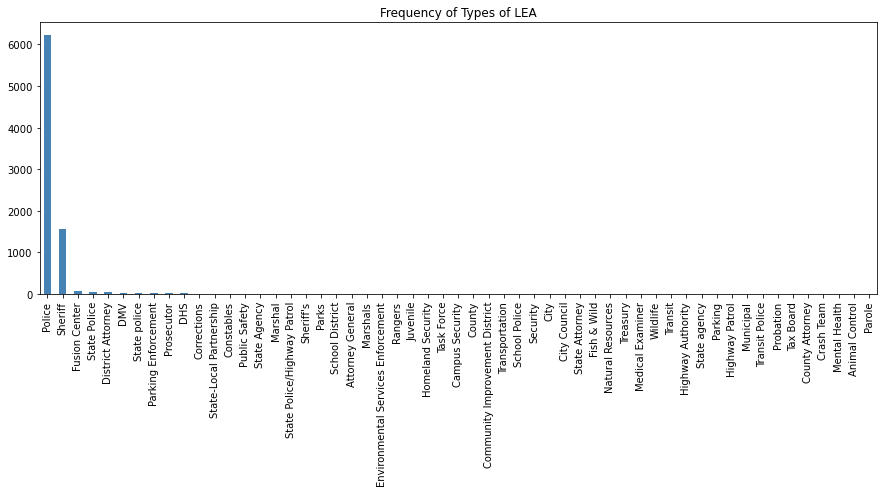

In [10]:
# plot bar graph
aos_lea_freq.plot(kind='bar', figsize=(15,5), title='Frequency of Types of LEA', color='steelblue')

##### Type of Jurisdiction

In [11]:
# get frequency of types of juris
aos_juris_freq = aos_df['Type of Juris'].value_counts()

In [12]:
print(aos_juris_freq)

Municipal               5785
County                  1725
University               249
State                    178
Regional                 132
School District           21
Federal                   20
Tribal                    17
Territory                 12
Parish                    10
Airport                    8
Statewide                  7
Transit                    4
Cross-jurisdictional       4
School                     3
Township                   2
Special District           2
Police                     1
Port                       1
Borough                    1
Transity                   1
Transportation             1
Name: Type of Juris, dtype: int64


<AxesSubplot:title={'center':'Frequency of Types of Juris'}>

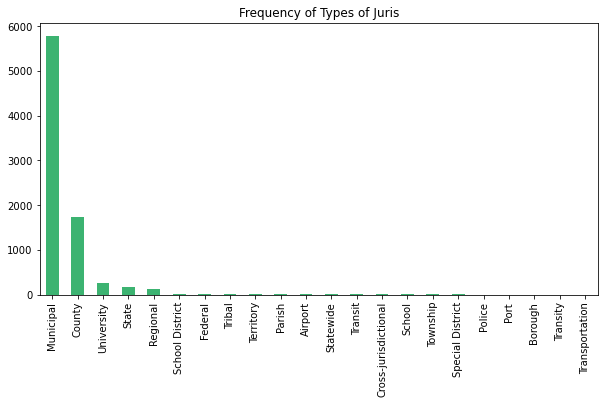

In [13]:
# plot bar graph
aos_juris_freq.plot(kind='bar', figsize=(10,5), title='Frequency of Types of Juris', color='mediumseagreen')

##### Technology

In [14]:
# get frequency of technology
aos_tech_freq = aos_df['Technology'].value_counts()

In [15]:
print(aos_tech_freq)

Body-worn Cameras                  2784
Ring/Neighbors Partnership         1903
Drones                             1181
Automated License Plate Readers     951
Camera Registry                     413
Face Recognition                    384
Predictive Policing                 160
Gunshot Detection                   133
Real-Time Crime Center               86
Fusion Center                        79
Cell-site Simulator                  70
Video Analytics                      40
Name: Technology, dtype: int64


<AxesSubplot:title={'center':'Frequency of Technology'}>

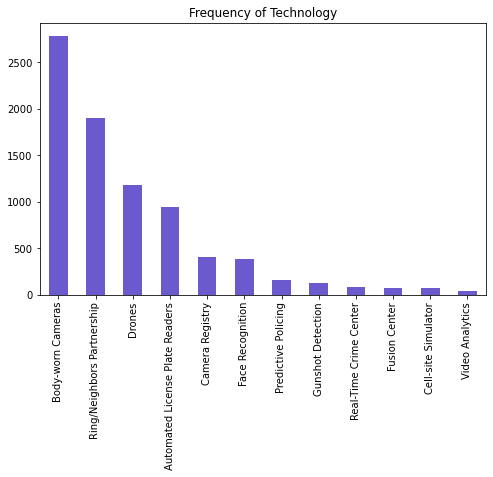

In [16]:
# plot bar graph
aos_tech_freq.plot(kind='bar', figsize=(8,5), title='Frequency of Technology', color='slateblue')

##### Vendor

In [17]:
# get frequency of vendors
aos_vendor_freq = aos_df['Vendor'].value_counts()

In [18]:
# filter vendors with frequencies no less than 5 times
aos_vendor_trimmed_freq = aos_vendor_freq[aos_vendor_freq >= 5]

In [19]:
print(aos_vendor_trimmed_freq)

Ring                                1903
DJI                                  598
Axon                                 435
Vigilant Solutions                   295
Idemia                               256
Motorola Solutions                   180
ShotSpotter                          123
IBM                                   98
Wolfcom                               91
Flock Safety                          67
WatchGuard                            59
Utility                               55
NDI Recognition Systems               48
Neology/PIPS                          35
Yuneec                                34
ELSAG                                 33
Harris Corp.                          27
Rekor Systems                         27
BriefCam                              25
Geolitica                             23
Selex                                 22
Clearview AI                          21
Coban                                 18
BodyWorn (Utility, Inc.)              16
Flock           

<AxesSubplot:title={'center':'Frequency of Selected Vendor'}>

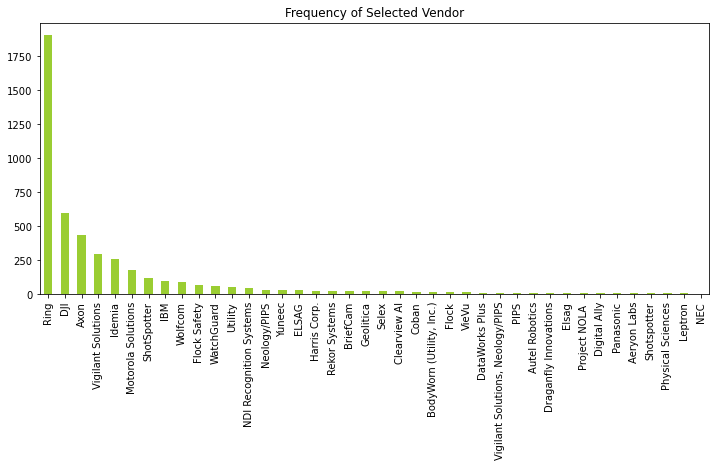

In [20]:
# plot bar graph
aos_vendor_trimmed_freq.plot(kind='bar', figsize=(12,5), title='Frequency of Selected Vendor', color='yellowgreen')

### Analysis Beginnings

In [21]:
# determine the frequency of states
aos_state_freq = aos_df['State'].value_counts()

<AxesSubplot:title={'center':'No. of Instances in States'}>

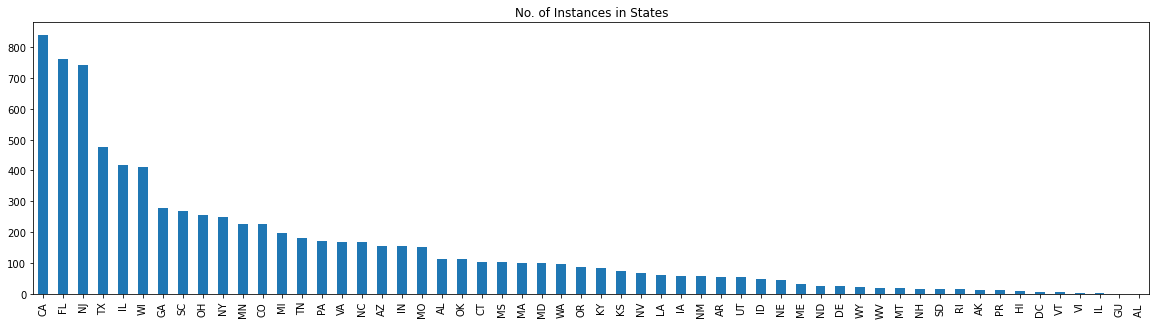

In [22]:
# create bar graph
aos_state_freq.plot(kind='bar', figsize=(20,5), title='No. of Instances in States')

The top three states are California, Florida, and New Jersey.

##### Explore LEA in States

In [23]:
# find the frequency of the most frequent type of LEA
aos_df['Type of LEA'].value_counts()[0]

6222

In [24]:
# find the most frequent type of LEA
aos_df['Type of LEA'].value_counts().reset_index()['index'][0]

'Police'

In [25]:
# determine no. of cases with police LEA for each state in the US
state_leaPolice_count = aos_df[aos_df['Type of LEA'] == 'Police']['State'].value_counts()

<AxesSubplot:title={'center':'Number of Cases with Police LEA Per State'}>

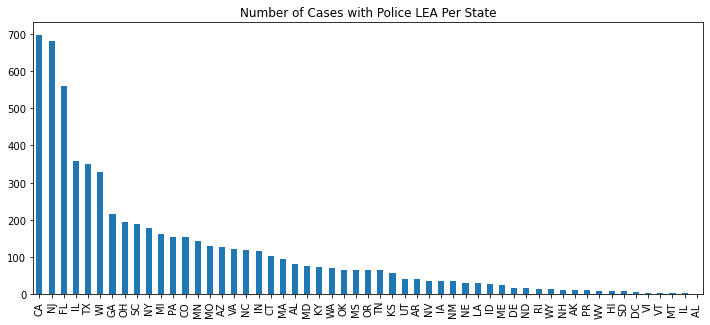

In [26]:
# plot bar graph
state_leaPolice_count.plot(kind='bar', figsize=(12,5), title='Number of Cases with Police LEA Per State')

##### Explore Type of Technology in States

In [27]:
# create dataframe that stores the count of kinds of technology of each state
state_tech_count = aos_df.groupby('Technology')['State'].value_counts().reset_index(name='counts')

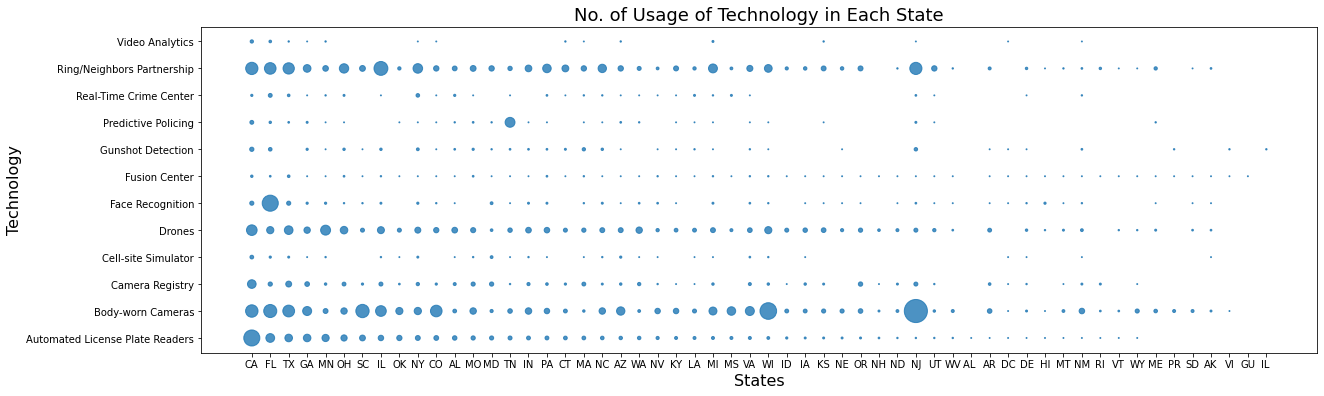

In [28]:
# create bubble plot (bubble size with "s")
plt.scatter('State', 'Technology', 
             s='counts', 
             alpha=0.8, 
             data=state_tech_count)
plt.xlabel("States", size=16)
plt.ylabel("Technology", size=16)
plt.title("No. of Usage of Technology in Each State", size=18)
plt.gcf().set_size_inches((20, 6))

Some most common technology uses are ring/neighbors partnership, body-worn cameras, automated license plate readers, and drones. From this graph, we can also see that some technology is extensively used in particular areas. For example, face recognition is used heavily in Florida but less in other states. In New Jersey, most cases are done with body-worn cameras while other kinds of technology are not as commonly used.

What percentage of the cases in New Jersey are with body-worn cameras instead of other technology?

In [29]:
# isolate dataframe of technology in New Jersey
stateNJ_tech_count = state_tech_count[state_tech_count['State'] == 'NJ']
# find percentage of usage of body-worn camera in NJ
int(stateNJ_tech_count[stateNJ_tech_count['Technology'] == 'Body-worn Cameras']['counts'])/sum(stateNJ_tech_count['counts'])

0.7216216216216216

In [30]:
# find the general percentage of body-worn cameras in all the states
aos_df['Technology'].value_counts()['Body-worn Cameras']/sum(aos_df['Technology'].value_counts())

0.34017595307917886

Nearly 3/4th (72%) of the cases in New Jersey use body-worn cameras. However, among all the states, the percentage of body-worn cameras is only 34%.

In [31]:
# find percentage of body-worn cameras among all technology in each state
state_techBWC_percentage = state_tech_count[state_tech_count['Technology'] == 'Body-worn Cameras'].groupby('State').sum() / state_tech_count.groupby('State').sum()

In [32]:
# sort values from high to low
state_techBWC_percentage = state_techBWC_percentage.sort_values('counts', ascending=False)

In [33]:
state_techBWC_percentage

,counts
State,
PR,0.750000
WY,0.739130
NJ,0.721622
MS,0.701923
WI,0.675610
SC,0.655556
SD,0.600000
CO,0.594714
NM,0.543860


<AxesSubplot:xlabel='State'>

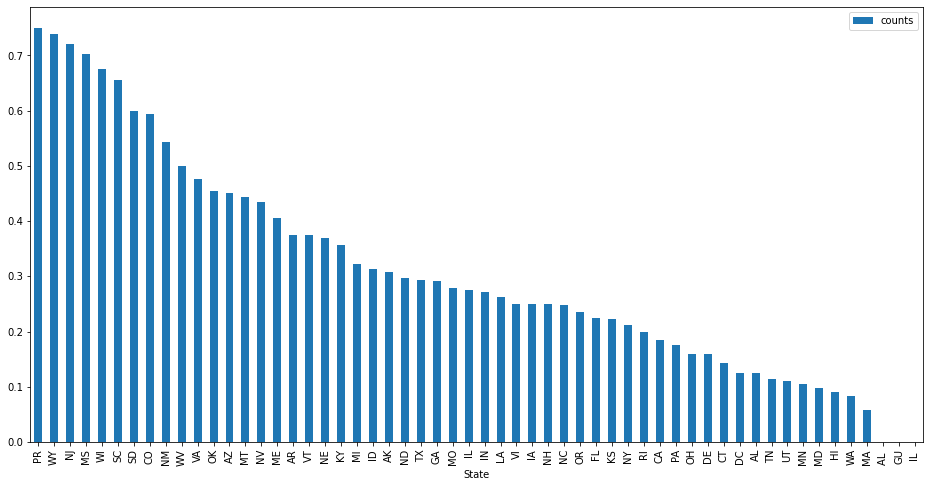

In [34]:
# create bar plot
state_techBWC_percentage.plot(kind='bar', figsize=(16,8))